#Data Loading and inspection

##Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data uploading

In [20]:
from google.colab import files
uploaded = files.upload()

Saving global_student_migration.csv to global_student_migration (2).csv


##Read and Display Data

In [21]:
df = pd.read_csv("global_student_migration.csv")
df.head()

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


##Explore Data

In [22]:
# dfset structure
df.info()

# Display basic statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


In [23]:
# Count missing values per column
print(df.isnull().sum())

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64


In [24]:
# Count duplicate rows
print(df.duplicated().sum())

0


# Data Cleaning

In [25]:
# Replace "None" or empty strings with NaN
df = df.replace(["None", ""], np.nan)

In [26]:
# Handle students who are not placed
mask_not_placed = df["placement_status"].str.lower() == "not placed"
df.loc[mask_not_placed, ["placement_country", "placement_company"]] = np.nan


In [27]:
# Replace starting salary 0 with NaN for not placed students
df.loc[(df["placement_status"].str.lower() == "not placed") &
       (df["starting_salary_usd"] == 0), "starting_salary_usd"] = np.nan


In [28]:
# Replace test_score 0 with NaN if no language test
df.loc[(df["language_proficiency_test"].isna()) &
       (df["test_score"] == 0), "test_score"] = np.nan


In [29]:
# Clean text columns
for col in ["scholarship_received", "placement_status", "visa_status", "language_proficiency_test"]:
    if col in df.columns:
        df[col] = df[col].str.strip().str.title()


In [30]:
# Check for invalid graduation years
invalid_years = df[df["graduation_year"] < df["year_of_enrollment"]]
if not invalid_years.empty:
    print("Found invalid graduation years:")
    print(invalid_years)


In [32]:
# Fill missing categorical values with "Unknown"
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')


In [33]:
# Display Data after cleaning
print(df.head())

  student_id origin_country destination_country destination_city  \
0     S00001        Finland              Russia           Moscow   
1     S00002             UK             Germany           Aachen   
2     S00003        Ireland              Canada        Vancouver   
3     S00004            UAE                  UK       Birmingham   
4     S00005   South Africa             Germany        Stuttgart   

                     university_name              course_name  \
0  Lomonosov Moscow State University         Computer Science   
1                        RWTH Aachen        Civil Engineering   
2     University of British Columbia                      Law   
3           University of Birmingham             Data Science   
4            University of Stuttgart  Business Administration   

    field_of_study  year_of_enrollment scholarship_received  \
0      Engineering                2021                   No   
1              Law                2023                  Yes   
2          

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          5000 non-null   object 
 13  placement_company          5000 non-null   objec

In [35]:
print(df.describe())

       year_of_enrollment  graduation_year  starting_salary_usd  gpa_or_score  \
count         5000.000000      5000.000000          2509.000000   5000.000000   
mean          2021.011000      2023.017800         88785.434436      3.246820   
std              1.420733         1.651432         34621.270826      0.430659   
min           2019.000000      2020.000000         30276.000000      2.500000   
25%           2020.000000      2022.000000         58371.000000      2.877500   
50%           2021.000000      2023.000000         87777.000000      3.240000   
75%           2022.000000      2024.000000        119002.000000      3.610000   
max           2023.000000      2026.000000        149932.000000      4.000000   

        test_score  
count  4018.000000  
mean      7.008711  
std       1.164340  
min       5.000000  
25%       6.000000  
50%       7.000000  
75%       8.000000  
max       9.000000  


In [36]:
print(df.isna().sum())

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country               0
placement_company               0
starting_salary_usd          2491
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test       0
test_score                    982
dtype: int64


#Feature Engineering


In [37]:
# Create boolean flags from categorical columns
df["scholarship_flag"] = df["scholarship_received"].map({"Yes": True, "No": False})
df["placed_flag"] = df["placement_status"].map({"Placed": True, "Not Placed": False})


#KPIs


In [38]:
# Calculate some key metrics for student placement and salaries
placement_rate = df['placed_flag'].mean() * 100
average_salary = df['starting_salary_usd'].mean()
average_salary_scholarship = df[df['scholarship_flag']]['starting_salary_usd'].mean()
average_salary_no_scholarship = df[~df['scholarship_flag']]['starting_salary_usd'].mean()
salary_difference = average_salary_scholarship - average_salary_no_scholarship

# Placement rate based on language proficiency test
placement_by_language = df.groupby('language_proficiency_test')['placed_flag'].mean() * 100

# Display the KPIs
print("Key Performance Indicators (KPIs)")
print(f"Placement Rate: {placement_rate:.2f}%")
print(f"Average Starting Salary: ${average_salary:,.2f}")
print(f"Average Salary (Scholarship): ${average_salary_scholarship:,.2f}")
print(f"Average Salary (No Scholarship): ${average_salary_no_scholarship:,.2f}")
print(f"Salary Difference: ${salary_difference:,.2f}")
print("Placement Rate by Language Test:")
print(placement_by_language)


Key Performance Indicators (KPIs)
Placement Rate: 50.18%
Average Starting Salary: $88,785.43
Average Salary (Scholarship): $88,617.83
Average Salary (No Scholarship): $88,961.11
Salary Difference: $-343.28
Placement Rate by Language Test:
language_proficiency_test
Duolingo    47.961165
Ielts       52.338308
Pte         49.549550
Toefl       50.813008
Unknown     50.305499
Name: placed_flag, dtype: float64


#Insights

In [39]:
insights = []

if placement_rate < 70:
    insights.append(f"Placement rate is relatively low ({placement_rate:.0f}%).")

if salary_difference > 0:
    insights.append("Students with scholarships have higher average salaries.")

if placement_by_language.max() - placement_by_language.min() > 10:
    insights.append("Language proficiency test results strongly influence placement rates.")

print("Insights:")
for i in insights:
    print(f"- {i}")

Insights:
- Placement rate is relatively low (50%).


#Recommendations


In [40]:

recommendations = []

if placement_rate < 70:
    recommendations.append("Expand job partnerships to improve placement rate.")
if salary_difference > 0:
    recommendations.append("Increase the number of scholarships to boost salary outcomes.")
if placement_by_language.max() - placement_by_language.min() > 10:
    recommendations.append("Offer language training programs to improve placement opportunities.")

print("Recommendations:")
for r in recommendations:
    print(f"- {r}")

Recommendations:
- Expand job partnerships to improve placement rate.


#Exploratory Data Analysis

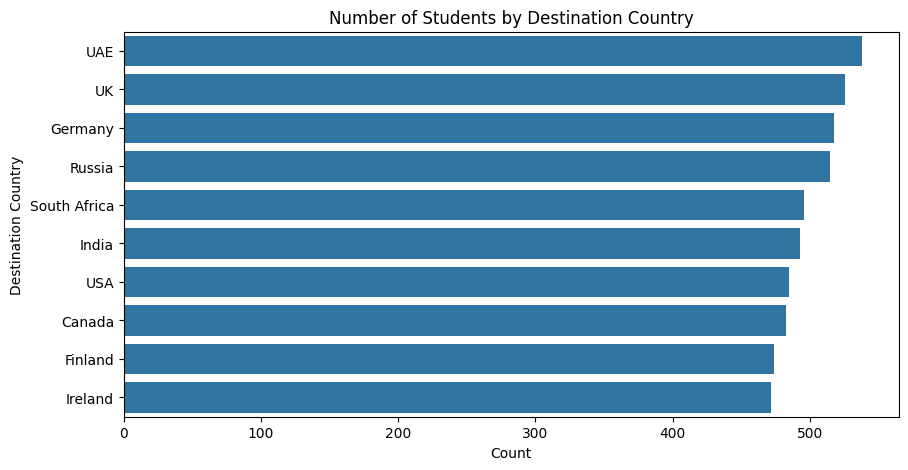

In [41]:

# Bar chart: Number of students by destination country
plt.figure(figsize=(10,5))
sns.countplot(y='destination_country', data=df, order=df['destination_country'].value_counts().index)
plt.title("Number of Students by Destination Country")
plt.xlabel("Count")
plt.ylabel("Destination Country")
plt.show()



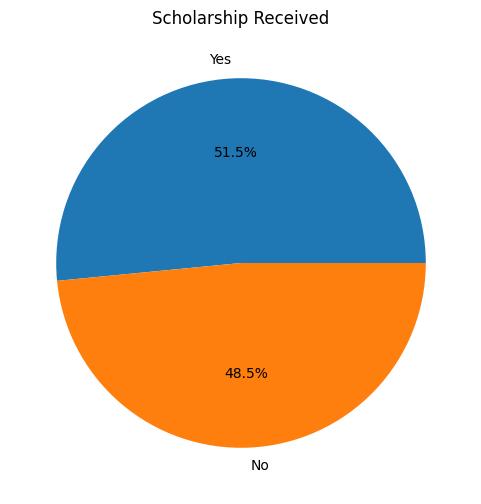

In [42]:
# Pie chart: Scholarship distribution
plt.figure(figsize=(6,6))
df['scholarship_received'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Scholarship Received")
plt.ylabel("")
plt.show()

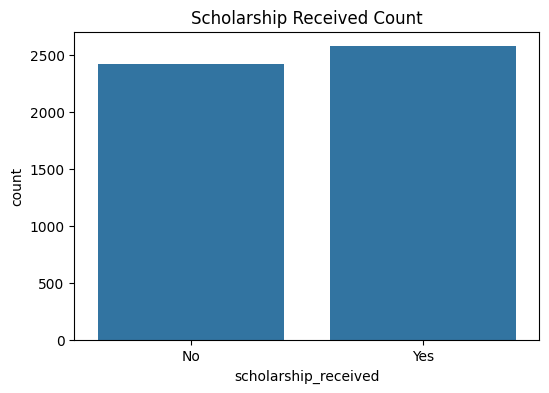

In [43]:
# Count Plot showing the number of students in each category of 'scholarship_received'
plt.figure(figsize=(6, 4))
sns.countplot(x="scholarship_received", data=df)
plt.title("Scholarship Received Count")
plt.show()

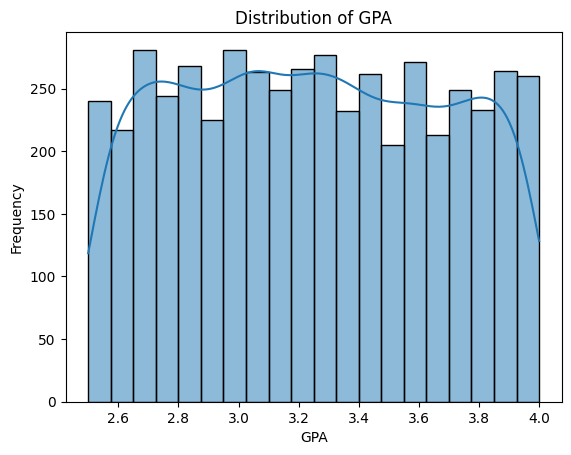

In [44]:
# Plot a histogram of the 'gpa_or_score'
sns.histplot(df['gpa_or_score'], bins=20, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

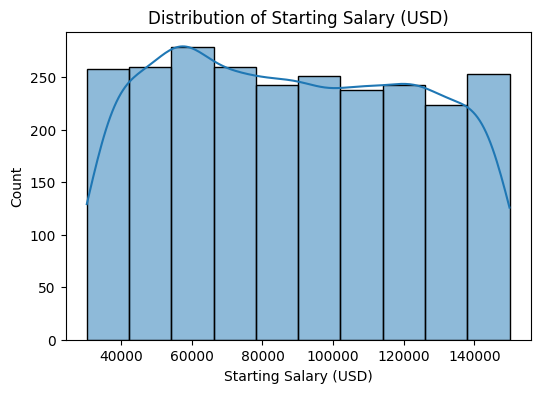

In [45]:
plt.figure(figsize=(6, 4))
sns.histplot(df["starting_salary_usd"].dropna(), bins=10, kde=True)
plt.title("Distribution of Starting Salary (USD)")
plt.xlabel("Starting Salary (USD)")
plt.show()


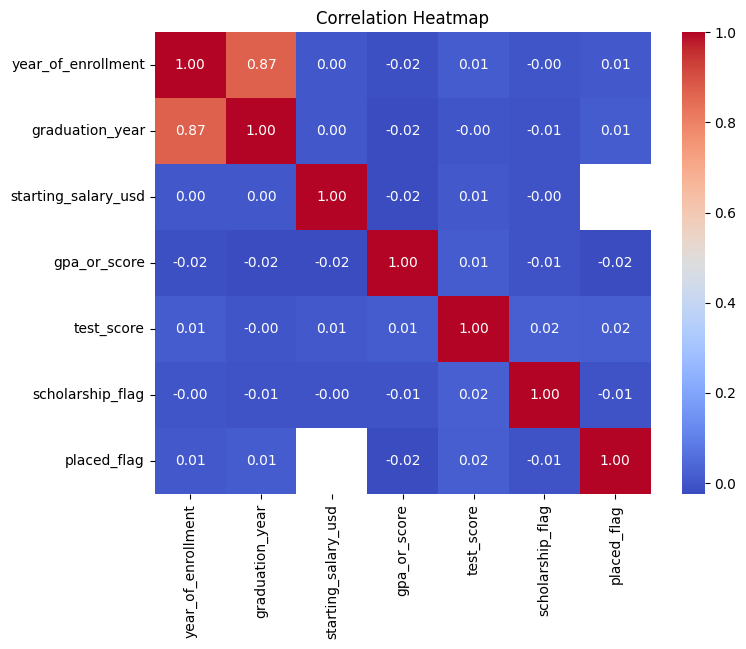

In [46]:
# Correlation Heatmap for numeric columns
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##Extract key insights

In [47]:
# Top 5 countries receiving most students
top_destinations = df['destination_country'].value_counts().head(5)
print("Top 5 Destination Countries:\n", top_destinations)

Top 5 Destination Countries:
 destination_country
UAE             538
UK              526
Germany         518
Russia          515
South Africa    496
Name: count, dtype: int64


In [48]:
# Average starting salary by field of study
avg_salary_by_field = df.groupby('field_of_study')['starting_salary_usd'].mean().sort_values(ascending=False)
print("\nAverage Starting Salary by Field of Study:\n", avg_salary_by_field)


Average Starting Salary by Field of Study:
 field_of_study
Medicine            92317.744526
Business            91072.245098
Law                 90966.996865
Social Sciences     88660.177177
Engineering         87801.701149
Computer Science    87459.235484
Arts                87277.836066
Natural Sciences    85255.031847
Name: starting_salary_usd, dtype: float64


In [49]:
# Correlation between GPA and salary
correlation = df['gpa_or_score'].corr(df['starting_salary_usd'])
print(f"\nCorrelation between GPA and Starting Salary: {correlation:.2f}")


Correlation between GPA and Starting Salary: -0.02
